# The association of LTC and its gradient with structural connectivity

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
import helpers, datasets, surfaces, matrices


DATA_DIR = '../data/'
OUTPUT_DIR = '../output/'
SRC_DIR = '../src/'

sns.set_style('ticks')

/home/asaberi/laminar_gradients/laminar_gradients_conda/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## a) Structural connectivity matrix

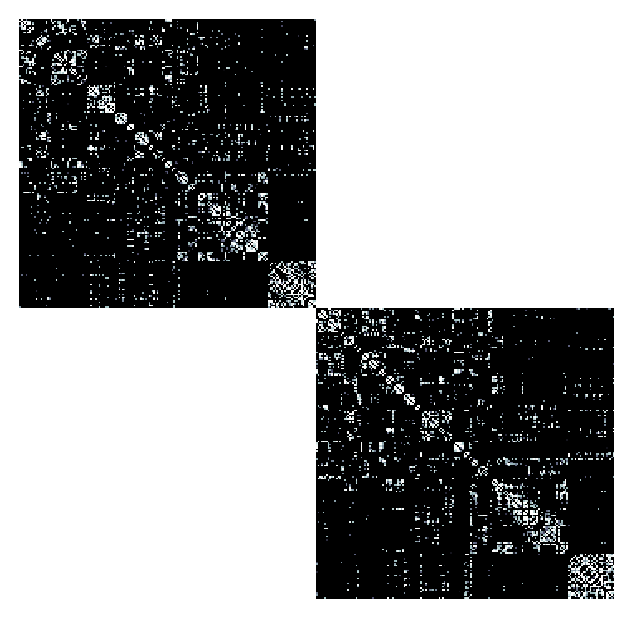

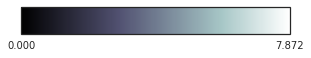

In [14]:
sc = matrices.ConnectivityMatrix('structural', exc_regions='adysgranular', exc_contra=True)
sc.plot()

## b) LTC in association with SC probability

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Optimization terminated successfully.
         Current function value: 0.292860
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                 0.08194
Time:                        10:59:02   Log-Likelihood:                -9383.5
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------

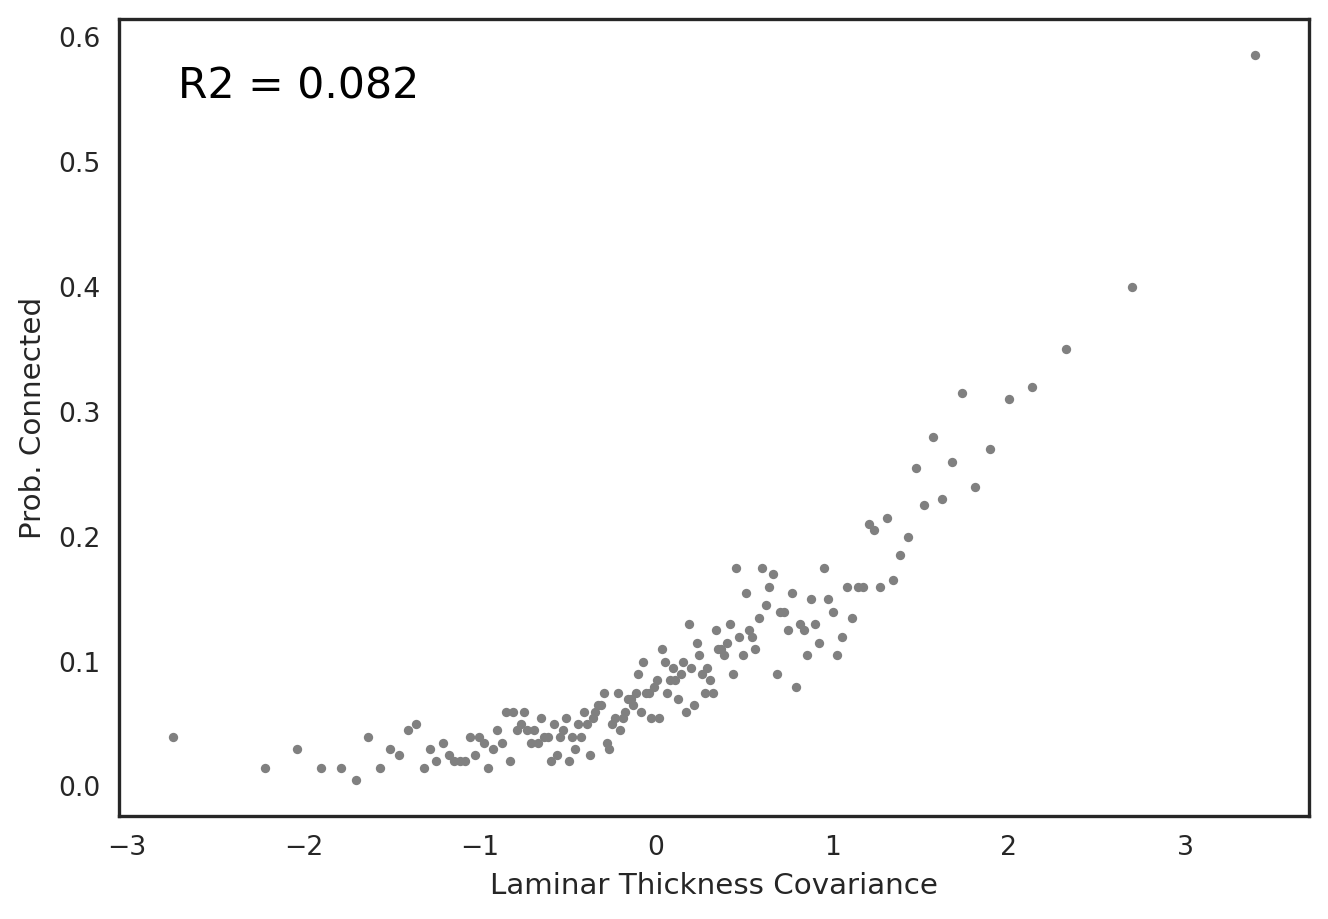

In [5]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
sc.binarized_association(ltc)

## c) LTC in associaiton with SC strength

In [3]:
sc_thr = matrices.ConnectivityMatrix('structural', threshold=True, exc_contra=True)

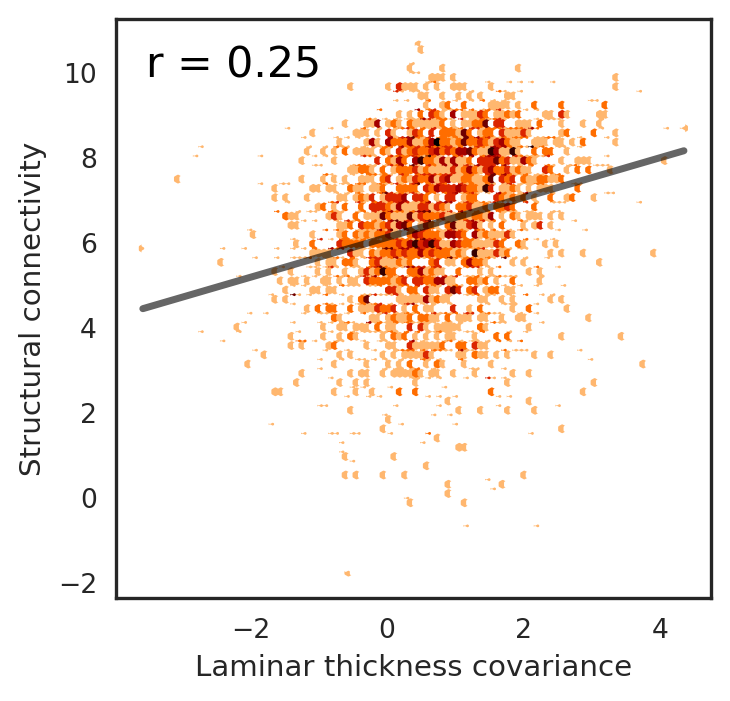

In [6]:
ltc.correlate_edge_wise(sc_thr, axis_off=False, figsize=(4, 4))

## d) Geodesic distance in association with SC probability

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz
Optimization terminated successfully.
         Current function value: 0.191227
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                  0.4005
Time:                        10:59:10   Log-Likelihood:                -6127.1
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

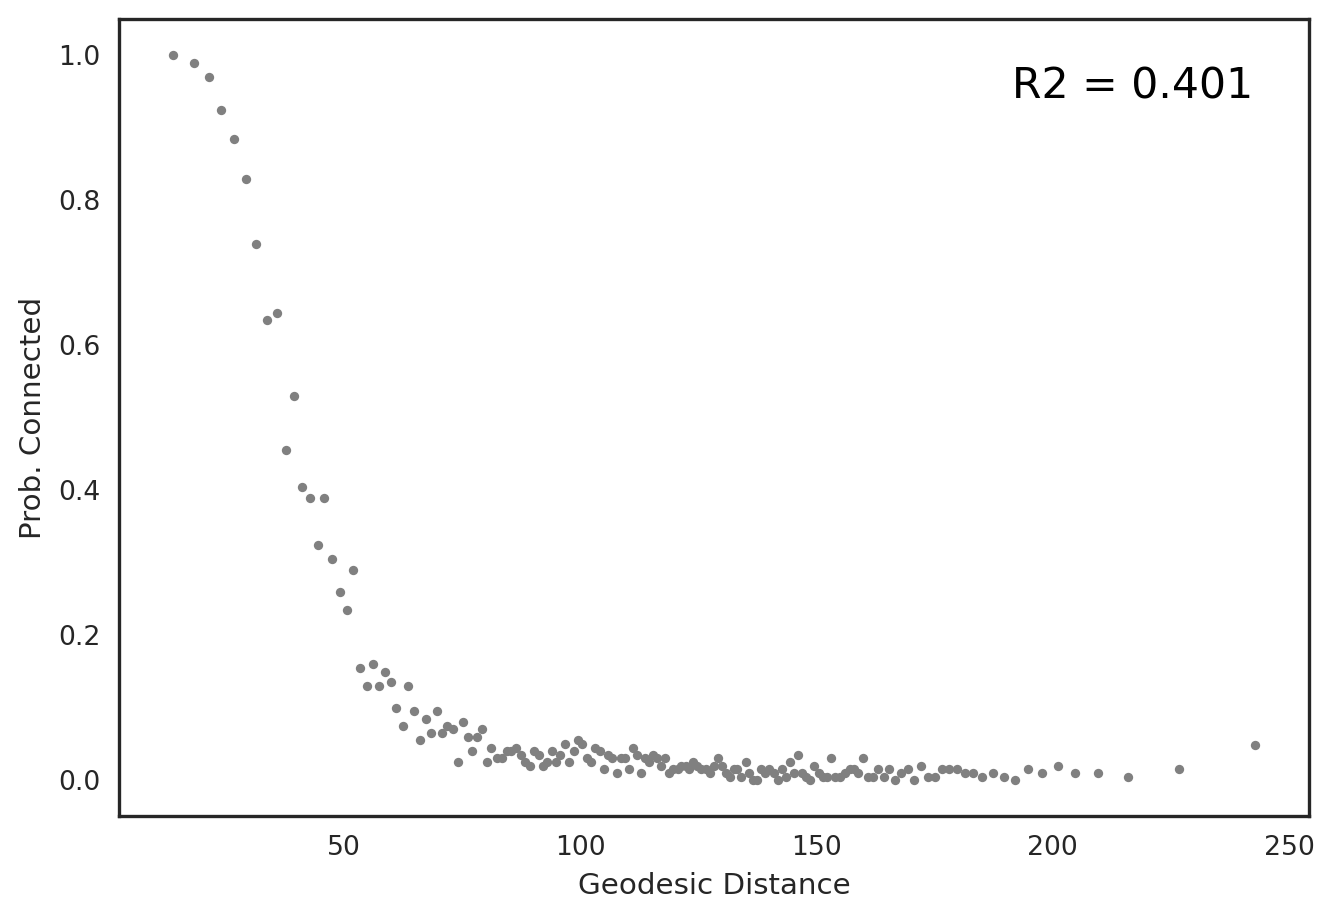

In [7]:
gd = matrices.DistanceMatrix('schaefer400')
sc.binarized_association(gd)

## e) Geodesic distance in association with SC strength

R2: 0.29804778825816003


/home/asaberi/laminar_gradients/laminar_gradients_conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


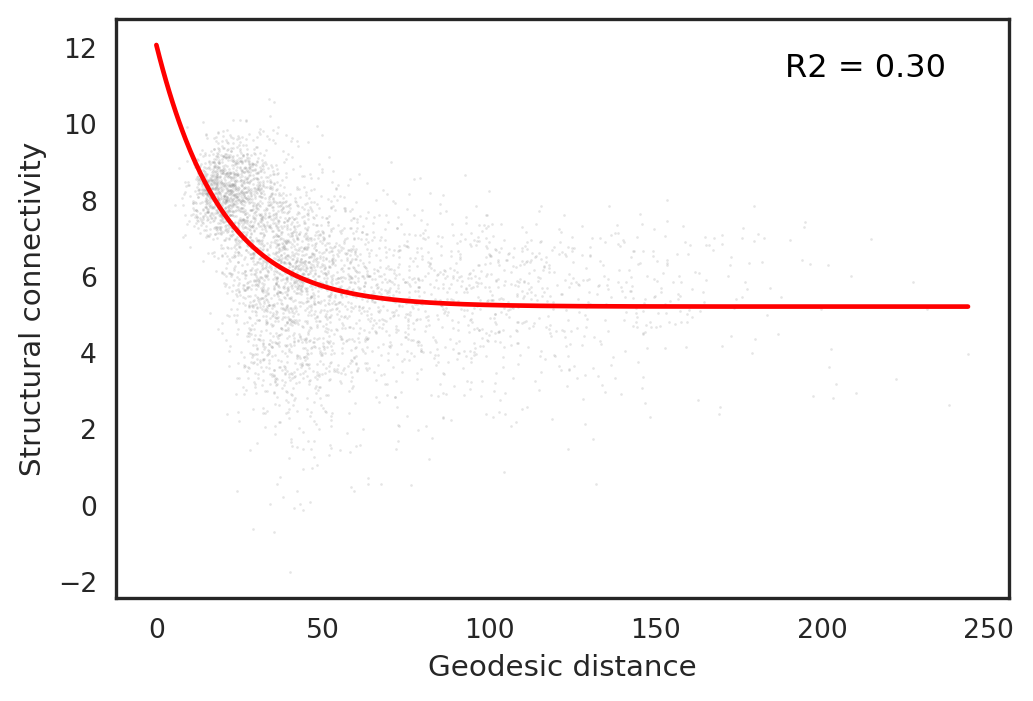

In [8]:
_ = gd.regress_out(sc_thr)

## f) LTC in association with long-range SC probability

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz
Optimization terminated successfully.
         Current function value: 0.100569
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                24597
Model:                          Logit   Df Residuals:                    24595
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                0.006203
Time:                        11:01:49   Log-Likelihood:                -2473.7
converged:                       True   LL-Null:                       -2489.1
Covariance Type:            nonrobust   LLR p-value:                 2.747e-08
                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------

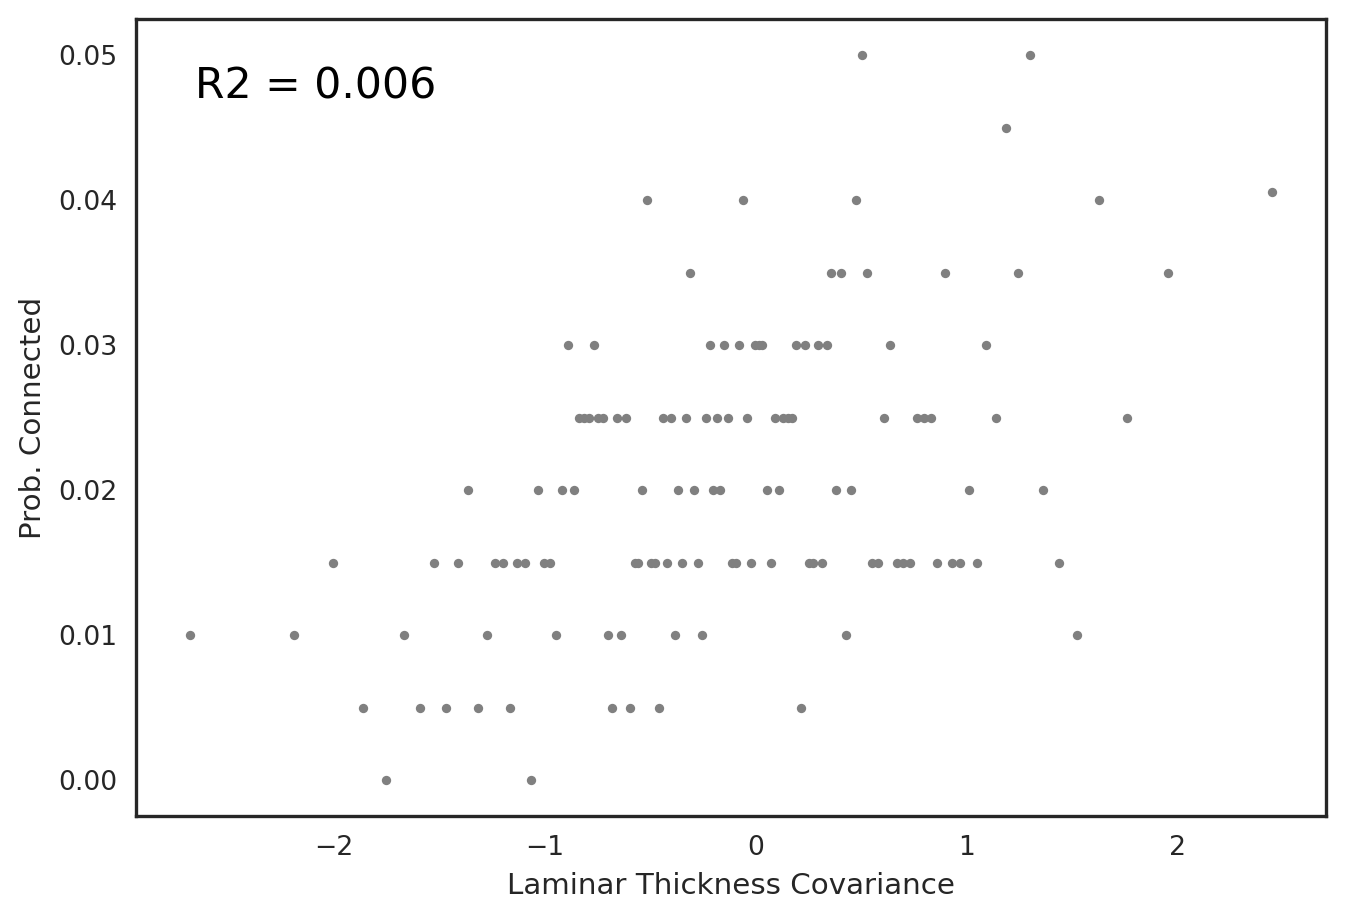

In [9]:
sc_long_range = matrices.ConnectivityMatrix('structural', exc_regions='adysgranular', exc_contra=True, long_range=True)
sc_long_range.binarized_association(ltc)

## g) LTC in association with long-range SC strength

In [15]:
sc_thr_long_range = matrices.ConnectivityMatrix('structural', threshold=True, exc_contra=True, long_range=True)

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz


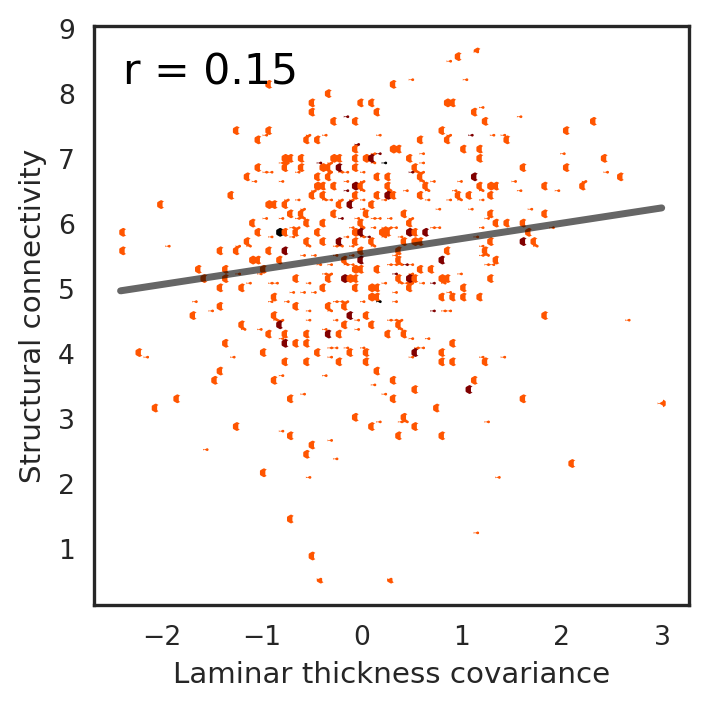

In [16]:
ltc.correlate_edge_wise(sc_thr_long_range, axis_off=False, figsize=(4, 4))